In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aasth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aasth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aasth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aasth\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
df = pd.read_csv(r"C:\Users\aasth\Downloads\metajob_metadata_extraction\RawMetajobsData.csv")
df.head()

,Unnamed,title,description,job_url
0,1,Java Software Developer (m/w/d),Java Software Developer (m/w/d) Eine erfolg...,https://www.metajob.at/dres/jc?p=001oy9401pvzcx
1,2,JAVA Developer (m/w/d),JAVA Developer (m/w/d) Entwicklung und Betr...,https://www.metajob.athttps://www.stepstone.at...
2,3,Java Developer (m/w/d),Java Developer (m/w/d) Betreiben & Betreuen ...,https://www.metajob.at/dres/jc?p=000a57f5r5xagj
3,4,Senior Java Webentwickler m/f/x,"Senior Java Webentwickler m/f/x JAVA EE, JA...",https://www.metajob.at/dres/jc?p=00fwskzmrkeel6
4,5,(Senior) Java Software Developer (m/w/d) - Sof...,(Senior) Java Software Developer (m/w/d) - Sof...,https://www.metajob.at/dres/jc?p=000a5vwbjy9un9


In [7]:
df.shape

(1589, 4)

In [8]:
def cleanDescription(descText):
    descText = descText.lower() #converting to lowercase
    descText = re.sub('http\S+\s*', ' ', descText)  # remove URLs
    descText = re.sub('RT|cc', ' ', descText)  # remove RT and cc
    descText = re.sub('#\S+', '', descText)  # remove hashtags
    descText = re.sub('@\S+', '  ', descText)  # remove mentions
    descText = re.sub(r'[0-9]', '', descText) # remove numbers
    descText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', descText)  # remove punctuations
    #descText = re.sub(r'[^\x00-\x7f]',r' ', descText) # remove non Non ASCII CHarecter
    descText = re.sub('\s+', ' ', descText)  # remove extra whitespace
    return descText 

In [9]:
df['cleaned_re'] = df['description'].apply(lambda x:cleanDescription(x))
df.head() 

,Unnamed,title,description,job_url,cleaned_re
0,1,Java Software Developer (m/w/d),Java Software Developer (m/w/d) Eine erfolg...,https://www.metajob.at/dres/jc?p=001oy9401pvzcx,java software developer m w d eine erfolgreich...
1,2,JAVA Developer (m/w/d),JAVA Developer (m/w/d) Entwicklung und Betr...,https://www.metajob.athttps://www.stepstone.at...,java developer m w d entwicklung und betreuung...
2,3,Java Developer (m/w/d),Java Developer (m/w/d) Betreiben & Betreuen ...,https://www.metajob.at/dres/jc?p=000a57f5r5xagj,java developer m w d betreiben betreuen eines ...
3,4,Senior Java Webentwickler m/f/x,"Senior Java Webentwickler m/f/x JAVA EE, JA...",https://www.metajob.at/dres/jc?p=00fwskzmrkeel6,senior java webentwickler m f x java ee java s...
4,5,(Senior) Java Software Developer (m/w/d) - Sof...,(Senior) Java Software Developer (m/w/d) - Sof...,https://www.metajob.at/dres/jc?p=000a5vwbjy9un9,senior java software developer m w d software...


In [10]:
def text_clean_2(text):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
  filtered_sentence = []
  wnl = WordNetLemmatizer()
 
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
  lemmatized_string = ' '.join([wnl.lemmatize(words) for words in filtered_sentence])
  return lemmatized_string         
  #return filtered_sentence

In [11]:
df['cleaned_text'] = df['cleaned_re'].apply(lambda x:text_clean_2(x))
df.head(2)

,Unnamed,title,description,job_url,cleaned_re,cleaned_text
0,1,Java Software Developer (m/w/d),Java Software Developer (m/w/d) Eine erfolg...,https://www.metajob.at/dres/jc?p=001oy9401pvzcx,java software developer m w d eine erfolgreich...,java software developer w eine erfolgreich abg...
1,2,JAVA Developer (m/w/d),JAVA Developer (m/w/d) Entwicklung und Betr...,https://www.metajob.athttps://www.stepstone.at...,java developer m w d entwicklung und betreuung...,java developer w entwicklung und betreuung von...


In [12]:
#getting the entire resume text
corpus=" "
for i in range(0,532):
    corpus= corpus+ df["cleaned_text"][i]

In [13]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('german')

alpha_word = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n' 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
#new_word = ['un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen']
new_word = ['abhängig', 'unterstützung', 'möglich', 'mehrjährige', 'unterstützt', 'unterstützen','durchführung', 'österreich','möglichkeit', 'lösungen', 'überzahlung', '•','berufserfahrung','un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen','liegt','st', 'erstellung','part','pr','mehrj','spannende', 'mindestgehalt','art','rund','ten','idealerweise','softwarel','bereitschaft','arbeitest','stellen','com','hrige','datenbanken','weltweit','ro','arbeitsweise','end', 'gesundheit','requirement','studium','qualifikationen', 'gt', 'selbstst','bringst','expert', 'arbeitsumfeld','karriere','jahre', 'angebot','regelm','bereits','offer','modernen', 'konzeption','umgang', 'ideen', 'onboarding', 'ren', 'architektur', 'implementierung', 'frau', 'ndige','high', 'good', 'customer', 'tech', 'chancengleichheit','en', 'user', 'inkl','mail','verantwortung','well''informationen','neuer','leidenschaft','rolle', 'erwartet','mobile','durchf','zahlreiche','arbeitsplatz', 'jahren','beim', 'kollektivvertrag','nstigungen','year','pro','top','freude', 'per','wiener', 'salzburg','weiterbildungen','process','gut','ffentliche','opportunity', 'ndig','hohe','betrieb','wissen','anbindung','glichen','kund','looking','aktiv','lebenslauf','welt', 'diverse','themen','wort','weiterbildungsm','lage','gesamten', 'balance', 'kv', 'sport', 'gross', 'geh', 'bietet','optimierung', 'like', 'platform','vielfalt','zusammen', 'apply', 'performance', 'schrift','stehen','ort','bewirb', 'gen', 'hour', 'based', 'quality', 'ansprechpartner','fundierte','state','innovativen','people', 'ansprechperson','tze', 'schwerpunkt','beko', 'qualification','individuelle','jahresbruttogehalt']

sw_nltk.extend(alpha_word)
sw_nltk.extend(new_word)

text = corpus
words = [word for word in text.split() if word.lower() not in sw_nltk]
sentence1 = " ".join(words)

#print(new_text)
print("Old length: ", len(text))
print("New length: ", len(sentence1))

Old length:  129458
New length:  84746


# Banking file

In [14]:
df_bk = pd.read_csv(r"C:\Users\aasth\Downloads\metajob_metadata_extraction\banking.csv")
df_bk.head()

,title,description,job_url
0,Teamassistent*in - Bank,Die renommierte Bank mit zentral gelegenem un...,https://www.metajob.at/dres/jc?p=000bdrqtnp7aj3
1,Financial Reporting - Back Office Mitarbeiter*...,Maturant*innen und Jungakademiker*innen wird a...,https://www.metajob.at/dres/jc?p=000bdrqtlhzrdg
2,Private Banker:in (m/w/d),Umfassende Betreuung bestehender Kund:innen im...,https://www.metajob.at/dres/jc?p=000a57f5jp7k9t
3,Geschäftsleitung / Raiffeisenbank Aist (m/w/d),Ergebnisorientierte Steuerung der Bank mit Bed...,https://www.metajob.athttps://www.stepstone.at...
4,Bankstellenleiter:in (w/m/d),"Bankstelle Himberg, Anstellungsart: Vollzeit -...",https://www.metajob.at/dres/jc?p=000a5vwb9o49lf


In [16]:
df_1 = [df_bk]
df_1 = pd.concat([df_bk], ignore_index=True, sort=False)

In [18]:
df_1=df_1.drop("job_url", axis='columns')

In [19]:
def cleanDescription(descText):
    descText = descText.lower() #converting to lowercase
    descText = re.sub('http\S+\s*', ' ', descText)  # remove URLs
    descText = re.sub('RT|cc', ' ', descText)  # remove RT and cc
    descText = re.sub('#\S+', '', descText)  # remove hashtags
    descText = re.sub('@\S+', '  ', descText)  # remove mentions
    descText = re.sub(r'[0-9]', '', descText) # remove numbers
    descText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', descText)  # remove punctuations
    #descText = re.sub(r'[^\x00-\x7f]',r' ', descText) # remove non Non ASCII CHarecter
    descText = re.sub('\s+', ' ', descText)  # remove extra whitespace
    return descText

In [20]:
df_1['cleaned_re'] = df_1['description'].apply(lambda x:cleanDescription(x))
df_1.head() 

,title,description,cleaned_re
0,Teamassistent*in - Bank,Die renommierte Bank mit zentral gelegenem un...,die renommierte bank mit zentral gelegenem un...
1,Financial Reporting - Back Office Mitarbeiter*...,Maturant*innen und Jungakademiker*innen wird a...,maturant innen und jungakademiker innen wird a...
2,Private Banker:in (m/w/d),Umfassende Betreuung bestehender Kund:innen im...,umfassende betreuung bestehender kund innen im...
3,Geschäftsleitung / Raiffeisenbank Aist (m/w/d),Ergebnisorientierte Steuerung der Bank mit Bed...,ergebnisorientierte steuerung der bank mit bed...
4,Bankstellenleiter:in (w/m/d),"Bankstelle Himberg, Anstellungsart: Vollzeit -...",bankstelle himberg anstellungsart vollzeit ihr...


In [21]:
def text_clean_2(text):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
  filtered_sentence = []
  wnl = WordNetLemmatizer()
 
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
  lemmatized_string = ' '.join([wnl.lemmatize(words) for words in filtered_sentence])
  return lemmatized_string         
  #return filtered_sentence

In [22]:
df_1['cleaned_text'] = df_1['cleaned_re'].apply(lambda x:text_clean_2(x))
df_1.head(2)

,title,description,cleaned_re,cleaned_text
0,Teamassistent*in - Bank,Die renommierte Bank mit zentral gelegenem un...,die renommierte bank mit zentral gelegenem un...,die renommierte bank mit zentral gelegenem und...
1,Financial Reporting - Back Office Mitarbeiter*...,Maturant*innen und Jungakademiker*innen wird a...,maturant innen und jungakademiker innen wird a...,maturant innen und jungakademiker innen wird h...


In [23]:
df_1=df_1.drop("cleaned_re", axis='columns')
df_1

,title,description,cleaned_text
0,Teamassistent*in - Bank,Die renommierte Bank mit zentral gelegenem un...,die renommierte bank mit zentral gelegenem und...
1,Financial Reporting - Back Office Mitarbeiter*...,Maturant*innen und Jungakademiker*innen wird a...,maturant innen und jungakademiker innen wird h...
2,Private Banker:in (m/w/d),Umfassende Betreuung bestehender Kund:innen im...,umfassende betreuung bestehender kund innen im...
3,Geschäftsleitung / Raiffeisenbank Aist (m/w/d),Ergebnisorientierte Steuerung der Bank mit Bed...,ergebnisorientierte steuerung der bank mit bed...
4,Bankstellenleiter:in (w/m/d),"Bankstelle Himberg, Anstellungsart: Vollzeit -...",bankstelle himberg anstellungsart vollzeit ihr...
...,...,...,...
1986,Förderungsmanager:in für Private Wohnen & Ener...,"Standort: Wien, 1090 - Bereich: Umwelt - Umfan...",standort wien bereich umwelt umfang vollzeit h...
1987,Firmenkundenbetreuer Mittelstand (m/w/d),"Sie betreuen eigentümergeführte, mittelständis...",sie betreuen eigentümergeführte mittelständisc...
1988,Firmenkundenbetreuer Immobilien & Bauträger (m...,Sie akquirieren & betreuen zielgerichtet Bautr...,sie akquirieren betreuen zielgerichtet bauträg...
1989,Partnerbetreuer (wmd),Auf- und Ausbau sowie regelmäßige Betreuung vo...,auf und ausbau sowie regelmäßige betreuung von...


In [24]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
 
stop_words = stopwords.words('german')
df_1['text_woStopwords'] = df_1['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aasth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
df_1=df_1.drop("title", axis='columns')
df_1=df_1.drop("description", axis='columns')
df_1=df_1.drop("cleaned_text", axis='columns')
df_1.head(2)

,text_woStopwords
0,renommierte bank zentral gelegenem gut erreich...
1,maturant innen jungakademiker innen hauptsitz ...


In [26]:
cell_text = print(df_1["text_woStopwords"].values[3])
print(cell_text)

ergebnisorientierte steuerung bank bedacht einhaltung aufsichtsrechtlicher vorgaben sowie raiffeisen werten strategische operative führung … führung coaching personalentwicklung mitarbeiterinnen
None


In [27]:
df_1.shape

(1991, 1)

In [28]:
#getting the entire resume text
Bank_corpus=" "
for i in range(0,1991):
    Bank_corpus= Bank_corpus+ df_1["text_woStopwords"][i]

In [29]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('german')

alpha_word = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n' 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
#new_word = ['un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen']
new_word = ['berufserfahrung','un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen','liegt','st', 'erstellung','part','pr','mehrj','spannende', 'mindestgehalt','art','rund','ten','idealerweise','softwarel','bereitschaft','arbeitest','stellen','com','hrige','datenbanken','weltweit','ro','arbeitsweise','end', 'gesundheit','requirement','studium','qualifikationen', 'gt', 'selbstst','bringst','expert', 'arbeitsumfeld','karriere','jahre', 'angebot','regelm','bereits','offer','modernen', 'konzeption','umgang', 'ideen', 'onboarding', 'ren', 'architektur', 'implementierung', 'frau', 'ndige','high', 'good', 'customer', 'tech', 'chancengleichheit','en', 'user', 'inkl','mail','verantwortung','well''informationen','neuer','leidenschaft','rolle', 'erwartet','mobile','durchf','zahlreiche','arbeitsplatz', 'jahren','beim', 'kollektivvertrag','nstigungen','year','pro','top','freude', 'per','wiener', 'salzburg','weiterbildungen','process','gut','ffentliche','opportunity', 'ndig','hohe','betrieb','wissen','anbindung','glichen','kund','looking','aktiv','lebenslauf','welt', 'diverse','themen','wort','weiterbildungsm','lage','gesamten', 'balance', 'kv', 'sport', 'gross', 'geh', 'bietet','optimierung', 'like', 'platform','vielfalt','zusammen', 'apply', 'performance', 'schrift','stehen','ort','bewirb', 'gen', 'hour', 'based', 'quality', 'ansprechpartner','fundierte','state','innovativen','people', 'ansprechperson','tze', 'schwerpunkt','beko', 'qualification','individuelle','jahresbruttogehalt']

sw_nltk.extend(alpha_word)
sw_nltk.extend(new_word)

text = Bank_corpus
words = [word for word in text.split() if word.lower() not in sw_nltk]
sentence2 = " ".join(words)

#print(new_text)
print("Old length: ", len(text))
print("New length: ", len(sentence2 ))

Old length:  419662
New length:  350691


In [30]:
def common_words(sentence1, sentence2):
    # split the sentences into lists of words
    words1 = sentence1.split()
    words2 = sentence2.split()
    
    # use set intersection to get the common words
    common = set(words1).intersection(words2)
    
    # convert the set back to a list and return it
    return list(common)

# print(common_words(sentence1, sentence2))
Common_words = common_words(sentence1, sentence2)
Common_words

['energie',
 'sicherstellung',
 'fachlichen',
 'implement',
 'modulen',
 'mitbringst',
 'closely',
 'source',
 'optimalen',
 'definieren',
 'ähnliches',
 'produktentwicklung',
 'absicherung',
 '…konzeption',
 'bestehender',
 'support',
 'architekturansätze',
 'alignment',
 'erhebung',
 'berufserfahrungen',
 'agiler',
 'jenkins',
 'steht',
 'standorten',
 'vorantreiben',
 'decision',
 'motivierte',
 'vollkommen',
 '…technische',
 'einsatz',
 'vienna',
 'vergünstigter',
 'senior',
 'iam',
 'standard',
 'case',
 'geschäftsbereichen',
 'arbeitet',
 'versicherung',
 'engagierten',
 'department',
 'eigenständig',
 'kleinen',
 'geschäftsstellen',
 'english',
 'beträgt',
 'middleware',
 'komplexe',
 'attraktive',
 'verantworten',
 'server',
 'gleichwertige',
 'produkten',
 'date',
 'cloud',
 'betreuen',
 'einbringen',
 'ergänzt',
 'daily',
 'personen',
 'credit',
 'interne',
 'bestellung',
 'passion',
 'mehrjähriger',
 'abwechslungsreichen',
 'sucht',
 'junge',
 'testen',
 'teilen',
 'tochteru

In [44]:
UnwantedWords = ['support', 'react', 'closely', 'mehrjährige', 'energie','source','unterstützt','vienna','feature','senior', 'unterstützen','durchführung', 'österreich','möglichkeit', 'lösungen', 'überzahlung']
sw_nltk.extend(Common_words)
sw_nltk.extend(UnwantedWords)

text = corpus
words = [word for word in text.split() if word.lower() not in sw_nltk]
NewCleanedText = " ".join(words)

#print(new_text)
print("Old length: ", len(sentence1))
print("New length: ", len(NewCleanedText ))

Old length:  84746
New length:  35335


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(NewCleanedText)

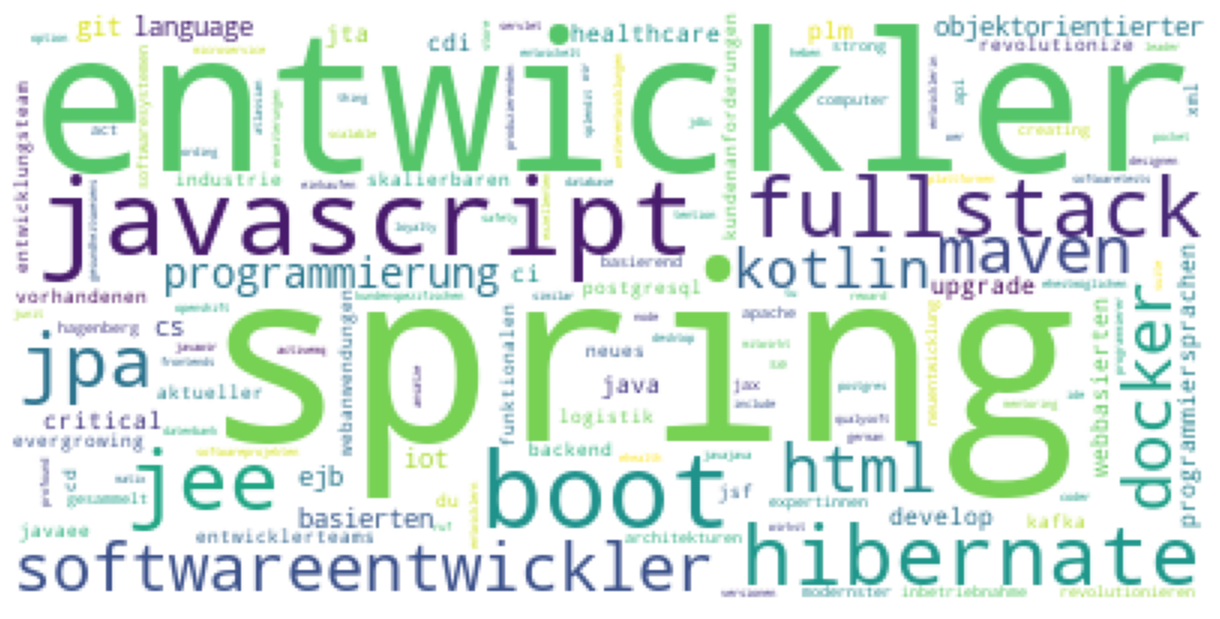

In [46]:
plt.figure(figsize = (12,12), facecolor = None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [47]:
tokenizer = nltk.tokenize.RegexpTokenizer('w+')
#Tokenizing the text
tokens = nltk.word_tokenize(NewCleanedText)
#tokens = tokenizer.tokenize(corpus)
len(NewCleanedText)

35335

In [48]:
freq_dist = nltk.FreqDist(tokens)
mostcommon = freq_dist.most_common(1000)
mostcommon

[('spring', 93),
 ('entwickler', 77),
 ('javascript', 38),
 ('boot', 36),
 ('hibernate', 22),
 ('jee', 22),
 ('fullstack', 22),
 ('jpa', 18),
 ('maven', 17),
 ('html', 17),
 ('docker', 17),
 ('softwareentwickler', 16),
 ('kotlin', 14),
 ('programmierung', 13),
 ('objektorientierter', 13),
 ('iot', 13),
 ('basierten', 12),
 ('cs', 12),
 ('’', 12),
 ('git', 12),
 ('ejb', 11),
 ('language', 11),
 ('webbasierten', 9),
 ('critical', 9),
 ('upgrade', 9),
 ('programmiersprachen', 9),
 ('cdi', 9),
 ('…java', 8),
 ('plm', 8),
 ('ci', 8),
 ('develop', 8),
 ('jta', 8),
 ('healthcare', 8),
 ('vorhandenen', 7),
 ('postgresql', 7),
 ('jsf', 7),
 ('entwicklungsteam', 7),
 ('cd', 7),
 ('evergrowing', 7),
 ('entwicklerteams', 7),
 ('industrie', 7),
 ('…du', 7),
 ('neues', 7),
 ('•', 7),
 ('logistik', 6),
 ('backends', 6),
 ('aktueller', 6),
 ('skalierbaren', 6),
 ('kundenanforderungen', 6),
 ('javaee', 6),
 ('webanwendungen', 6),
 ('xml', 6),
 ('kafka', 6),
 ('funktionalen', 6),
 ('revolutionieren', 6)

In [49]:
import pandas as pd

# Sample sentence
sentence = NewCleanedText

# Split the sentence into words
words = sentence.split()

# Calculate the number of rows required
num_rows = (len(words) + 199) // 200

# Create a DataFrame with the required number of rows
df_Words = pd.DataFrame({'Words': ['']*num_rows})

# Populate each row of the DataFrame with up to 200 words
for i in range(num_rows):
    start_index = i * 200
    end_index = min((i+1) * 200, len(words))
    df_Words.iloc[i] = ' '.join(words[start_index:end_index])

# Print the resulting DataFrame
print(df_Words)

                                                Words
0   automatisierungstechnik programmierung sqljava...
1   ehealth modularen medizinischen gesamtprozess ...
2   algorithm shield attackneu webbasierten spring...
3   webanwendungen cm ecommerce webentwicklungunse...
4   hibernate jms activemq jax json git subversion...
5   gmünd webportale gesamtprozess anforderungserh...
6   jee aktueller zdigitalisierung gomarket mvp mm...
7   softwaresystemen programmierung request formul...
8   planbaren fixen programmierung mde bde cad plm...
9   met spring boot spring microservicesarea manag...
10  wofür entwicklungdu se jobbezeichnung develope...
11  jpa adesso beratungsunternehmen adesso spring ...
12  ’ …mindestens se gleichbehandlungsgesetz minde...
13  telematics skalierbarer spring spring boot spr...
14  programmierung mde bde cad plm logistik schink...
15  downstream collaboration …backend entwicklerte...
16  programmiersprache programmiersprachen anwendu...


In [50]:
df_Words.to_csv("Cleaned_words_javameta.csv", index= False) 